In [28]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [29]:
from tensorflow.examples.tutorials.mnist import input_data

In [30]:
tf.set_random_seed(777)

In [31]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [32]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [33]:
# input placeholders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [34]:
# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [35]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [36]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Epoch :  0001 cost =  177.921138115
Epoch :  0002 cost =  39.396775471
Epoch :  0003 cost =  24.732209492
Epoch :  0004 cost =  17.337733232
Epoch :  0005 cost =  12.677326244
Epoch :  0006 cost =  9.329474321
Epoch :  0007 cost =  7.076217647
Epoch :  0008 cost =  5.225967341
Epoch :  0009 cost =  3.929895688
Epoch :  0010 cost =  2.948634100
Epoch :  0011 cost =  2.308671111
Epoch :  0012 cost =  1.677759420
Epoch :  0013 cost =  1.255159846
Epoch :  0014 cost =  1.027580654
Epoch :  0015 cost =  0.835569505
Learning Finished!
Accuracy :  0.9456
Label :  [1]
Prediction :  [1]


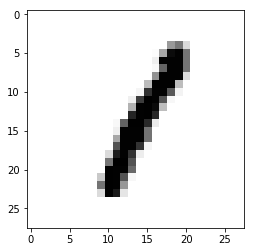

In [37]:
# train my model
for epoch in range(training_epochs) :
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch) :
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {
            # 플레이스홀더 입력값
            X : batch_xs, Y : batch_ys
        }
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy : ', sess.run(accuracy, 
                              feed_dict = {X : mnist.test.images, Y : mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples-1)
print('Label : ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print('Prediction : ', sess.run(tf.argmax(hypothesis, 1), 
                                feed_dict = {X : mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation = 'nearest')
plt.show()